## AIT526-S01 Lab 2

---------------------------------------------------------------------------------------

Created by Dr. Liao (6/5/2020)

Professor Maryam Heidari

---------------------------------------------------------------------------------------

### Group 4

Student's Full Name: Penny O'Brien, Maniphone Sourivong, Muge Yalcin

Submission Date: 6/24/2023

---------------------------------------------------------------------------------------

### Text Summarization for Webpage

#### 1 Text Summarization with Word Frequencies

##### Import Libraries

In [1]:
import random
import re
import nltk
import bs4 as bs # Beautiful Soup 
import urllib.request
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import string
import heapq

##### 1.1 Scrape the textdata from webpage with BeautifulSoup

In [2]:
def scrape_webpage(url):
    """
    Use BeautifulSoup to scrape the webpage text contents.
    """
    scraped_textdata = urllib.request.urlopen(url)
    textdata = scraped_textdata.read()
    parsed_textdata = bs.BeautifulSoup(textdata, 'lxml')
    paragraphs = parsed_textdata.find_all('p')
    formatted_text = ""

    for para in paragraphs:
        formatted_text += para.text

    return formatted_text

In [3]:
formatted_text = scrape_webpage('https://en.wikipedia.org/wiki/Natural_language_processing')

#### 1.2 Preprocess the text data and include tokenizing words, removing stop words and punctuation

In [4]:
# tokenize words
tokenizer = nltk.RegexpTokenizer(r"\w+")
words = tokenizer.tokenize(formatted_text)
print("Number of words: ", len(words))

# remove punctuation
filtered_words = [word for word in words if word not in string.punctuation]

# remove stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in filtered_words if word.lower() not in stop_words]

print("Number of stop words:", len(stop_words))
print("Number of words without stop words: ", len(filtered_words))

Number of words:  1459
Number of stop words: 179
Number of words without stop words:  941


#### 1.3 Calculate word frequencies

In [5]:
freq_dist = nltk.FreqDist(filtered_words)
print(f"Number of words: {len(words)}")
print(f"Number of unique words: {len(freq_dist)}")

Number of words: 1459
Number of unique words: 541


#### 1.4 Score the sentences

In [6]:
# Tokenize sentences
sentences = sent_tokenize(formatted_text)

# Score sentences based on word frequencies
sentence_scores = {}
for sentence in sentences:
    sentence_words = tokenizer.tokenize(sentence)
    sentence_frequency = sum([freq_dist[word] for word in sentence_words])
    sentence_scores[sentence] = sentence_frequency

# Sort sentences by score (highest to lowest)
sorted_sentences = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)

# Print sentences sorted by score (highest to lowest)
for sentence, score in sorted_sentences:
    print(sentence)
    print("Score:", score)
    print()

More recent systems based on machine-learning algorithms have many advantages over hand-produced rules: 
Despite the popularity of machine learning in NLP research, symbolic methods are still (2020) commonly used:
Since the so-called "statistical revolution"[18][19] in the late 1980s and mid-1990s, much natural language processing research has relied heavily on machine learning.
Score: 268

As an example, George Lakoff offers a methodology to build natural language processing (NLP) algorithms through the perspective of cognitive science, along with the findings of cognitive linguistics,[48] with two defining aspects:
Ties with cognitive linguistics are part of the historical heritage of NLP, but they have been less frequently addressed since the statistical turn during the 1990s.
Score: 202

Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language

#### 1.5 Build a summary based on sentence count, word count, and percentage

In [7]:
# Summary based on sentence count
def sentence_count_summary(sentence_scores, num_sentences):
    summary_sentences = heapq.nlargest(num_sentences, sentence_scores, key=sentence_scores.get)
    summary = ' '.join(summary_sentences)
    return summary

In [8]:
# Summary based on word count
def word_count_summary(sentence_scores, num_words):
    sorted_sentences = heapq.nlargest(len(sentence_scores), sentence_scores, key=sentence_scores.get)
    summary_words = []
    word_count = 0
    for sentence in sorted_sentences:
        sentence_words = word_tokenize(sentence)
        if word_count + len(sentence_words) <= num_words:
            summary_words.extend(sentence_words)
            word_count += len(sentence_words)
        else:
            summary_words.extend(sentence_words[:num_words - word_count])
            break
    summary = ' '.join(summary_words)
    return summary

In [9]:
# Summary based on percentage
def percentage_summary(sentence_scores, percentage):
    sorted_sentences = heapq.nlargest(len(sentence_scores), sentence_scores, key=sentence_scores.get)
    total_words = sum(len(word_tokenize(sentence)) for sentence in sorted_sentences)
    num_words = int(total_words * (percentage / 100))
    summary_words = []
    for sentence in sorted_sentences:
        sentence_words = word_tokenize(sentence)
        if len(summary_words) + len(sentence_words) <= num_words:
            summary_words.extend(sentence_words)
        else:
            break
    summary = ' '.join(summary_words)
    return summary

# Define the parameters for summary generation
num_sentences = 3
num_words = 50
percentage = 20

# Generate summaries based on sentence count, word count, and percentage
summary_sentence_count = sentence_count_summary(sentence_scores, num_sentences)
summary_word_count = word_count_summary(sentence_scores, num_words)
summary_percentage = percentage_summary(sentence_scores, percentage)

# Print the summaries
print("Summary based on sentence count:")
print(summary_sentence_count)
print()

print("Summary based on word count:")
print(summary_word_count)
print()

print("Summary based on percentage:")
print(summary_percentage)
print()

Summary based on sentence count:
More recent systems based on machine-learning algorithms have many advantages over hand-produced rules: 
Despite the popularity of machine learning in NLP research, symbolic methods are still (2020) commonly used:
Since the so-called "statistical revolution"[18][19] in the late 1980s and mid-1990s, much natural language processing research has relied heavily on machine learning. As an example, George Lakoff offers a methodology to build natural language processing (NLP) algorithms through the perspective of cognitive science, along with the findings of cognitive linguistics,[48] with two defining aspects:
Ties with cognitive linguistics are part of the historical heritage of NLP, but they have been less frequently addressed since the statistical turn during the 1990s. Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human

#### 2 Text Summarization with N-grams

##### 2.1 Generate N-grams with NLTK:

In [10]:
from nltk.util import ngrams
from nltk.probability import FreqDist

# Function to generate n-grams from the text. 
def generate_ngrams(text, n):
    n_grams = ngrams(nltk.word_tokenize(text.lower()), n)
    return [ ' '.join(grams) for grams in n_grams]

##### 2.2 Text Summarization with any N-grams

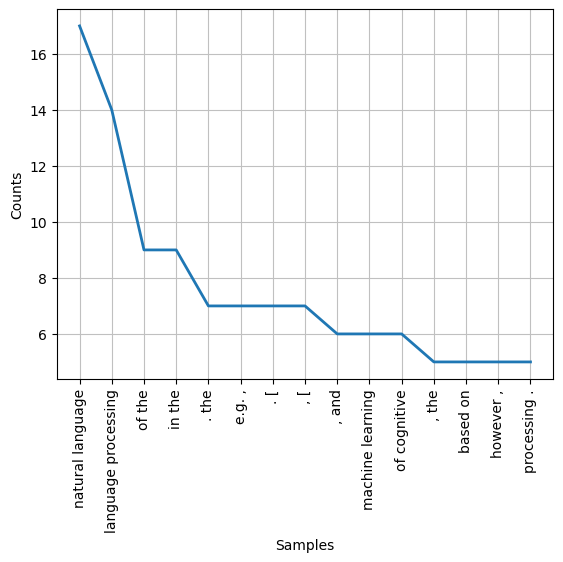

Most common 2 grams:
[('natural language', 17), ('language processing', 14), ('of the', 9), ('in the', 9), ('. the', 7), ('e.g. ,', 7), ('. [', 7), (', [', 7), (', and', 6), ('machine learning', 6), ('of cognitive', 6), (', the', 5), ('based on', 5), ('however ,', 5), ('processing .', 5)]



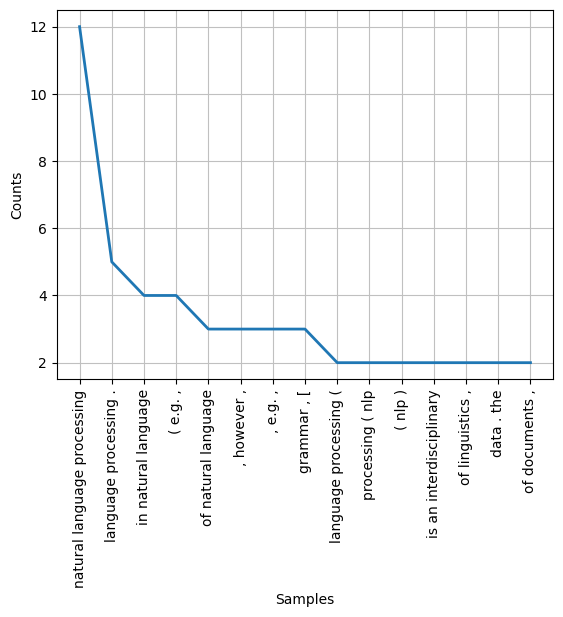

Most common 3 grams:
[('natural language processing', 12), ('language processing .', 5), ('in natural language', 4), ('( e.g. ,', 4), ('of natural language', 3), (', however ,', 3), (', e.g. ,', 3), ('grammar , [', 3), ('language processing (', 2), ('processing ( nlp', 2), ('( nlp )', 2), ('is an interdisciplinary', 2), ('of linguistics ,', 2), ('data . the', 2), ('of documents ,', 2)]



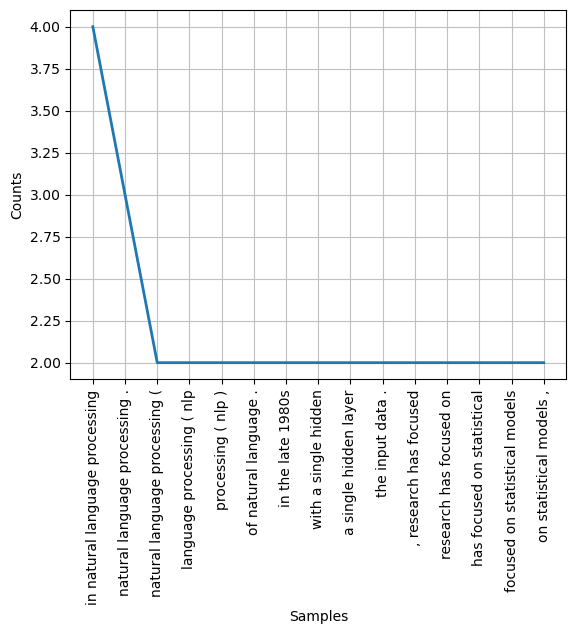

Most common 4 grams:
[('in natural language processing', 4), ('natural language processing .', 3), ('natural language processing (', 2), ('language processing ( nlp', 2), ('processing ( nlp )', 2), ('of natural language .', 2), ('in the late 1980s', 2), ('with a single hidden', 2), ('a single hidden layer', 2), ('the input data .', 2), (', research has focused', 2), ('research has focused on', 2), ('has focused on statistical', 2), ('focused on statistical models', 2), ('on statistical models ,', 2)]



In [11]:
# Define the parameters for summary generation
text = scrape_webpage('https://en.wikipedia.org/wiki/Natural_language_processing')
n_gram_sizes = [2, 3, 4]  # Different N-gram sizes

# Generate N-grams and calculate frequencies for each N-gram size
for n in n_gram_sizes:
    ngrams_list = generate_ngrams(text, n)
    ngrams_freq = FreqDist(ngrams_list)

    # Plot the frequency distribution of N-grams
    ngrams_freq.plot(15)
    
    # Print the most common N-grams
    print("Most common", n, "grams:")
    print(ngrams_freq.most_common(15))
    print()

##### 2.3 Weighted frequency occurences from FreqDist.

In [12]:
# Function to calculate weighted frequency occurrences from FreqDist.
def find_weighted_frequency(freq_dist):
    total_count = sum(freq_dist.values())
    weighted_freqs = {gram: freq / total_count for gram, freq in freq_dist.items()}
    return weighted_freqs

# Calculate weighted frequency occurrences for the FreqDist
ngrams_freqs = find_weighted_frequency(ngrams_freq)
print("Weighted frequency occurrences:")
print(list(ngrams_freqs.items())[:20])

Weighted frequency occurrences:
[('natural language processing (', 0.0012113870381586917), ('language processing ( nlp', 0.0012113870381586917), ('processing ( nlp )', 0.0012113870381586917), ('( nlp ) is', 0.0006056935190793458), ('nlp ) is an', 0.0006056935190793458), (') is an interdisciplinary', 0.0006056935190793458), ('is an interdisciplinary subfield', 0.0006056935190793458), ('an interdisciplinary subfield of', 0.0006056935190793458), ('interdisciplinary subfield of linguistics', 0.0006056935190793458), ('subfield of linguistics ,', 0.0006056935190793458), ('of linguistics , computer', 0.0006056935190793458), ('linguistics , computer science', 0.0006056935190793458), (', computer science ,', 0.0006056935190793458), ('computer science , and', 0.0006056935190793458), ('science , and artificial', 0.0006056935190793458), (', and artificial intelligence', 0.0006056935190793458), ('and artificial intelligence concerned', 0.0006056935190793458), ('artificial intelligence concerned wit

##### 2.4 Define function like calculate_sentence_scores ngram to calculate the sentences scores for any N-grams

In [13]:
# Function to calculate sentence scores based on N-gram frequencies
def calculate_sentence_scores_ngram(sent_tokens, ngram_freqs, n_grams):
    sentence_scores = {}
    for sentence in sent_tokens:
        words = word_tokenize(sentence.lower())
        score = 0
        for n in range(2, n_grams + 1):
            ngrams_list = generate_ngrams(sentence, n)
            for ngram in ngrams_list:
                score += ngram_freqs.get(ngram, 0)
        sentence_scores[sentence] = score
    return sentence_scores

# Print sentence scores
for sentence, score in sentence_scores.items():
    print(sentence)
    print("Score:", score)
    print()

Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.
Score: 195

The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.
Score: 50

The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.
Score: 18

Challenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation.
Score: 181

Natural language processing has its roots in the 1950s.
Score: 51

Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test

##### 2.5 Summarized text using tri-grams and 3 sentences

In [14]:
# Build the summary based on the specified criteria
def build_summary(sentences, sentence_scores, summary_type, num_sentences, num_words, percentage):
    sorted_scores = sorted(((score, index) for index, score in enumerate(sentence_scores)), reverse=True)
    selected_sentences = [sentences[index] for _, index in sorted_scores[:num_sentences]]
    summarized_words = []
    current_word_count = 0
    total_word_count = sum(len(nltk.word_tokenize(sentence.lower())) for sentence in sentences)  # Calculate the total word count
    for sentence in selected_sentences:
        words = nltk.word_tokenize(sentence.lower())
        current_word_count += len(words)
        if summary_type == "word_count" and current_word_count > num_words:
            break
        if summary_type == "percentage" and current_word_count > total_word_count * (percentage / 100):
            break
        summarized_words.extend(words)
    summary = " ".join(summarized_words)
    return summary

summary_sentence = build_summary(sentences, sentence_scores, "sentence_count", num_sentences=3, num_words=None, percentage=None)
summary_word = build_summary(sentences, sentence_scores, "word_count", num_sentences=None, num_words=50, percentage=None)
summary_percent = build_summary(sentences, sentence_scores, "percentage", num_sentences=None, num_words=None, percentage=20)

print("Summary based on Sentence Count:")
print(summary_sentence)
print("\nSummary based on Word Count:")
print(summary_word)
print("\nSummary based on Percentage:")
print(summary_percent)

Summary based on Sentence Count:
transformational grammar ) , whose theoretical underpinnings discouraged the sort of corpus linguistics that underlies the machine-learning approach to language processing . speech [ 21 ] ) . [ 7 ] in 2010 , tomáš mikolov ( then a phd student at brno university of technology ) with co-authors applied a simple recurrent neural network with a single hidden layer to language modelling , [ 8 ] and in the following years he went on to develop word2vec .

Summary based on Word Count:
transformational grammar ) , whose theoretical underpinnings discouraged the sort of corpus linguistics that underlies the machine-learning approach to language processing . speech [ 21 ] ) .

Summary based on Percentage:
transformational grammar ) , whose theoretical underpinnings discouraged the sort of corpus linguistics that underlies the machine-learning approach to language processing . speech [ 21 ] ) . [ 7 ] in 2010 , tomáš mikolov ( then a phd student at brno university 

#### Comparisons

#### Reference: Dr. Liao’s Python code Examples & tutorials

##### All python code referenced are from Dr. Liao unless otherwise stated under the specific code.